In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 70) 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print(matplotlib.backends.backend)

import plotly
import plotly.plotly as py
import plotly.figure_factory as ff

import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

plotly.tools.set_credentials_file(username='ashu.ingenuity@gmail.com', api_key='yvO5VATu1byoKNShHVN0')

module://ipykernel.pylab.backend_inline


In [2]:
from plotly.plotly import iplot
import cufflinks as cf
import plotly.tools as tls
tls.embed('https://plot.ly/~cufflinks/8')
#! pip install cufflinks --upgrade
cf.__version__

'0.15'

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#! pip install pandas-ml
#Creating catboost model
from catboost import CatBoostClassifier
from catboost import Pool
#
from sklearn.ensemble import RandomForestClassifier as RFC
#Matrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from pandas_ml import ConfusionMatrix

In [4]:
#SMOTE
#!pip install imblearn
from imblearn.over_sampling import SMOTE

In [5]:
# importing basic libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
# importing linear regressionfrom sklearn
from sklearn.linear_model import LinearRegression

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

# Reading master data frame

In [8]:
master = pd.read_csv('./master.csv')

In [9]:
master = master.drop(['level_0'], axis=1)
master = master.drop (['Presence_of_violation'], axis =1)

#### Removing outlier in case rate and death rate column

In [10]:
#master.loc[master.County.str.contains('Union')]

#### Florida 'Union' county is outlier and we are replacing its cancer rate or death rate with median of Florida: Case_rate : 422.7 and Death_Rate: 174.90

In [11]:
master.at[342, 'Case_Rate'] = 422.7
master.at[342, 'Death_Rate'] = 174.90

In [12]:
#master.iloc[342]

### How death rate or new case rate of cancer was calculated for multiple years in this data?
DEATH RATE or NEW CASES FOR MULTIPLE DATA YEARS: Death rates are calculated based on the sum of the resident populations for each of the data years involved (e.g. the denominator of a rate for 2005-2011 combined is the sum of the population estimates for 2005, 2006, 2007, 2008, 2009, 2010 and 2011). 

# HealthyPeople.gov intitated a goal-oriented approach to reduce cancer deaths and set the targets for 2020.
### Baseline (Year): 179.3 (2007)
### Target: 161.4 for 2020
Target-Setting Method: 10 percent improvement
Numerator: Number of deaths due to cancer (ICD-10 codes C00-C97).

In 2013, rates for 2007–2009 were revised using intercensal population estimates based on the 2000 and 2010 censuses instead of the postcensal estimates for the denominator to provide more accurate rates for the period. Thus, the original baseline was revised from 178.4 to 179.3. The target was adjusted from 160.6 to 161.4 to reflect the revised baseline using the original target-setting method. Note that all mortality rates shown here for 2001–2009 (or any subset of those years) are based on intercensal population estimates and may differ from those previously published on the Internet or in print. In 2015, the denominator data source name was revised from Population Estimates to Bridged-Race Population Estimates for Census 2000 and 2010. The numerator data source, baseline estimate, target, and target-setting method remain unchanged. In 2017, the estimates for geographic location were updated to reflect the 2013 urban/rural classification scheme.
More Reading: https://www.healthypeople.gov/node/4047/data_details#revision_history_header

## Based on the target cancer death rate mentioned by healthypeople.gov I am categorizing the counties >161.4 for above baseline (ABL) or <161.4 to below base line (BBL). 

In [13]:
#master['BBL'] = master['Death_Rate'].apply(lambda x: 1 if x < 161.4  else 0)

In [14]:
master['Deaths_Above_Baseline'] = master['Death_Rate'].apply(lambda x: 1 if x > 161  else 0)
master['Cases_Above_Average'] = master['Case_Rate'].apply(lambda x: 1 if x > 450.0  else 0)

## Segregating the determinants based on their category. Socio-eco and physical environment, clinical-care, health-behaviors and health-outcomes-indicators.

In [15]:
# Health behaviors and co-morbidity
X_health = master.drop(['FIPS', 'State', 'County', 'Child_Mortality_Rate',
       'Infant_Mortality_Rate', 'MV_Mortality_Rate','pct_Food_Insecure', 'pct_Limited_Access_to_healthy_foods',
       'Household_Income', 'pct_Homeowners','Income_Ratio', 'pct_African_American',
       'pct_American_Indian_Alaskan_Native', 'pct_Asian','pct_Native_Hawaiian_Other_Pacific_Islander', 'pct_Hispanic',
       'pct_Non_Hispanic_White','pct_Fair_Poor', 'Physically_Unhealthy_Days', 
        'pct_LBW','pct_Alcohol_Impaired', 'Mentally_Unhealthy_Days', 'pct_Uninsured', 'PCP_Rate','Food_Environment_Index',
       'Dentist_Rate', 'MHP_Rate', 'Preventable_Hosp._Rate','Graduation_Rate', 'pct_Some_College', 'pct_access_excercise',
       'pct_Unemployed', 'pct_Children_in_Poverty', 'Violent_Crime_Rate','Injury_Death_Rate', 'Average_Daily_PM2.5', 
        'pct_Severe_Housing_Problems', 'pct_Screened', 'pct_Vaccinated'], axis=1)

In [16]:
#Socio-economical and physical environment
X_SEP = master.drop(['FIPS', 'State', 'County', 'Child_Mortality_Rate',
       'Infant_Mortality_Rate', 'pct_Diabetic', 'HIV_Prevalence_Rate', 'Drug_Overdose_Mortality_Rate', 
        'MV_Mortality_Rate', 'pct_Insufficient_Sleep', 
       'pct_Fair_Poor', 'Physically_Unhealthy_Days', 'pct_LBW', 'pct_Smokers','pct_Obese', 'pct_Physically_Inactive', 
        'Mentally_Unhealthy_Days', 'pct_Excessive_Drinking', 'pct_Alcohol_Impaired',
       'Chlamydia_Rate', 'Teen_Birth_Rate', 'pct_Uninsured', 'PCP_Rate', 'Dentist_Rate', 'MHP_Rate', 
        'Preventable_Hosp._Rate', 'pct_Screened', 'pct_Vaccinated'
        ], axis=1)

In [17]:
#Clinical Care
X_clinic = master.drop(['FIPS', 'State', 'County', 'Child_Mortality_Rate',
       'Infant_Mortality_Rate', 'pct_Diabetic', 'HIV_Prevalence_Rate','pct_Food_Insecure', 
        'pct_Limited_Access_to_healthy_foods','Drug_Overdose_Mortality_Rate', 'MV_Mortality_Rate', 
        'pct_Insufficient_Sleep', 'Household_Income', 'pct_Homeowners',
        'pct_African_American', 'pct_American_Indian_Alaskan_Native', 'pct_Asian', 
        'pct_Native_Hawaiian_Other_Pacific_Islander', 'pct_Hispanic', 'pct_Non_Hispanic_White', 
        'pct_Fair_Poor', 'Physically_Unhealthy_Days', 'pct_LBW', 'pct_Smokers',
       'pct_Obese', 'Food_Environment_Index', 'pct_Physically_Inactive','pct_access_excercise', 'pct_Excessive_Drinking', 
        'pct_Alcohol_Impaired', 'Chlamydia_Rate', 'Teen_Birth_Rate', 'Mentally_Unhealthy_Days', 
       'Graduation_Rate', 'pct_Some_College','Income_Ratio','pct_Unemployed', 'pct_Children_in_Poverty', 
        'Violent_Crime_Rate','Injury_Death_Rate', 'Average_Daily_PM2.5',
       'pct_Severe_Housing_Problems'], axis=1)

In [18]:
# Health outcomes
X_outcomes = master.drop(['FIPS', 'State', 'County', 'Child_Mortality_Rate',
        'pct_Diabetic', 'HIV_Prevalence_Rate','pct_Food_Insecure', 'pct_Limited_Access_to_healthy_foods',
       'Drug_Overdose_Mortality_Rate', 'MV_Mortality_Rate','pct_Insufficient_Sleep', 'Household_Income', 
        'pct_Homeowners', 'pct_African_American', 
        'pct_American_Indian_Alaskan_Native', 'pct_Asian', 'pct_Native_Hawaiian_Other_Pacific_Islander', 
        'pct_Hispanic', 'pct_Non_Hispanic_White', 'pct_Smokers','Income_Ratio','pct_Obese', 'Food_Environment_Index', 
        'pct_Physically_Inactive', 'pct_access_excercise', 'pct_Excessive_Drinking', 'pct_Alcohol_Impaired',
       'Chlamydia_Rate', 'Teen_Birth_Rate', 'pct_Uninsured', 'PCP_Rate', 'Dentist_Rate', 'MHP_Rate', 
        'Preventable_Hosp._Rate', 'pct_Screened', 'pct_Vaccinated', 'Graduation_Rate', 'pct_Some_College',
       'pct_Unemployed', 'pct_Children_in_Poverty', 'Violent_Crime_Rate','Injury_Death_Rate', 'Average_Daily_PM2.5', 
        'pct_Severe_Housing_Problems'], axis=1)

### Looking over the correlation of variables in each category with cancer rate

In [19]:
#sns.pairplot(X_SEP)

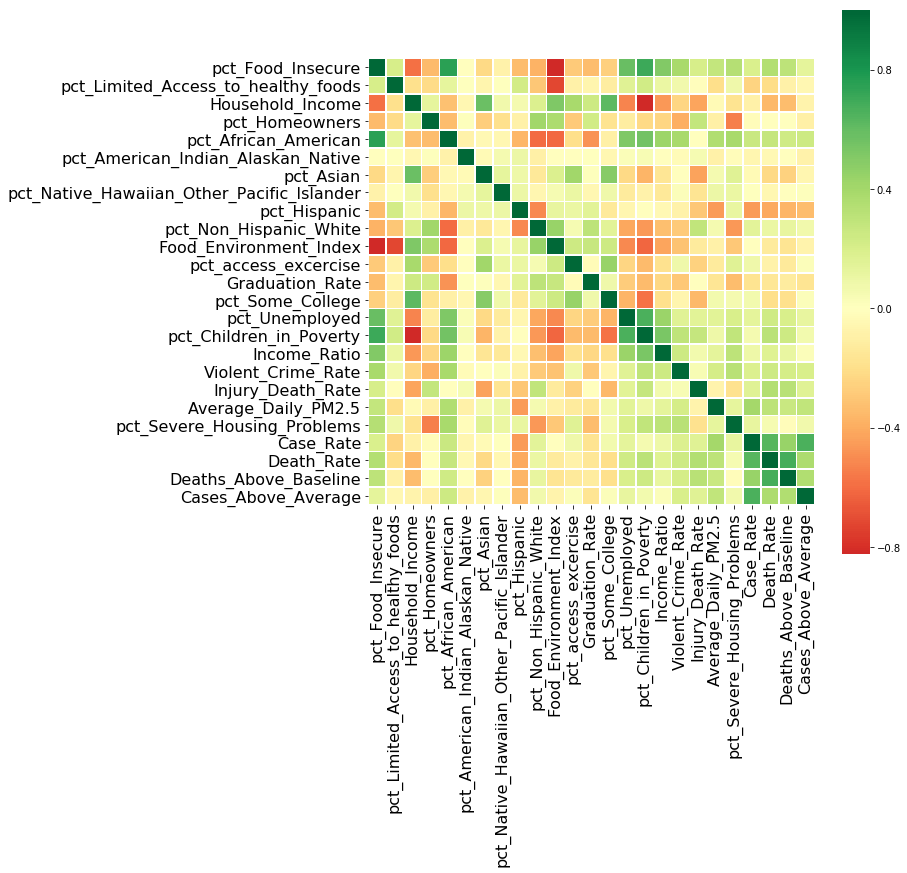

In [20]:
plt.figure(figsize=(10,10))
 
sns.heatmap(X_SEP.corr(), square=True, cmap='RdYlGn', center=0, linewidths=.5)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16);

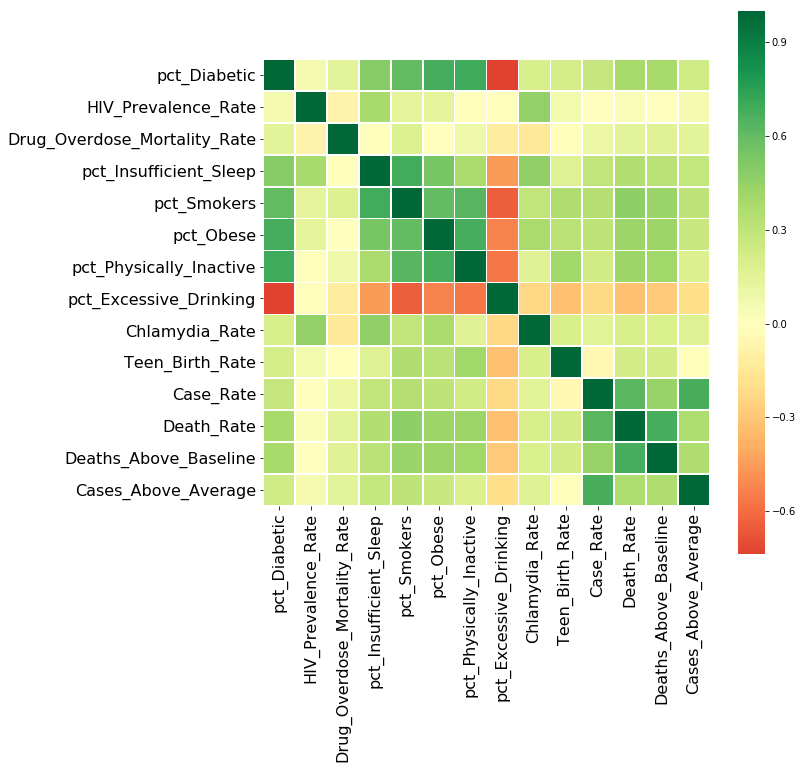

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(X_health.corr(), square=True, cmap='RdYlGn', center=0, linewidths=.5)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16);

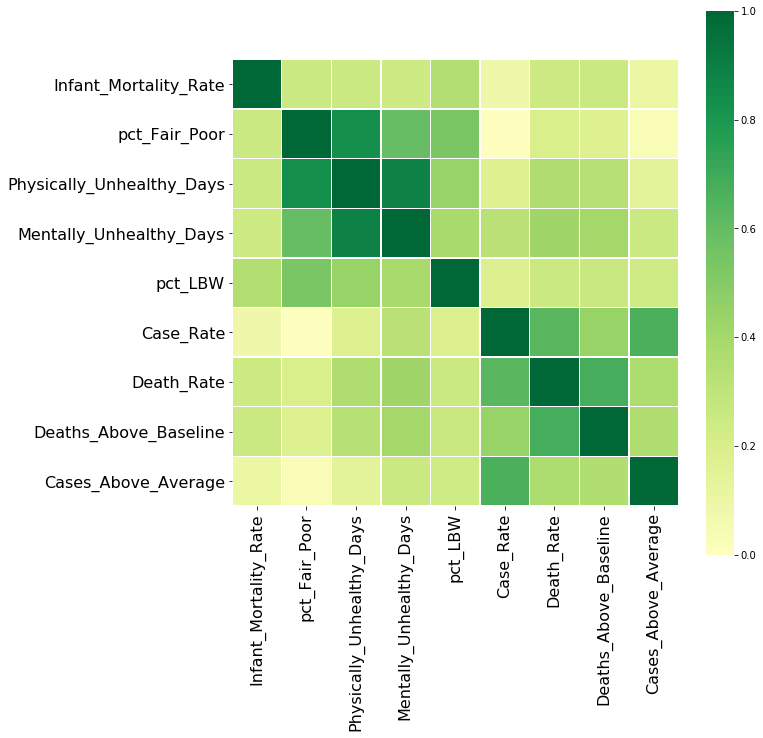

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(X_outcomes.corr(), square=True, cmap='RdYlGn', center=0,linewidths=.5)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16);

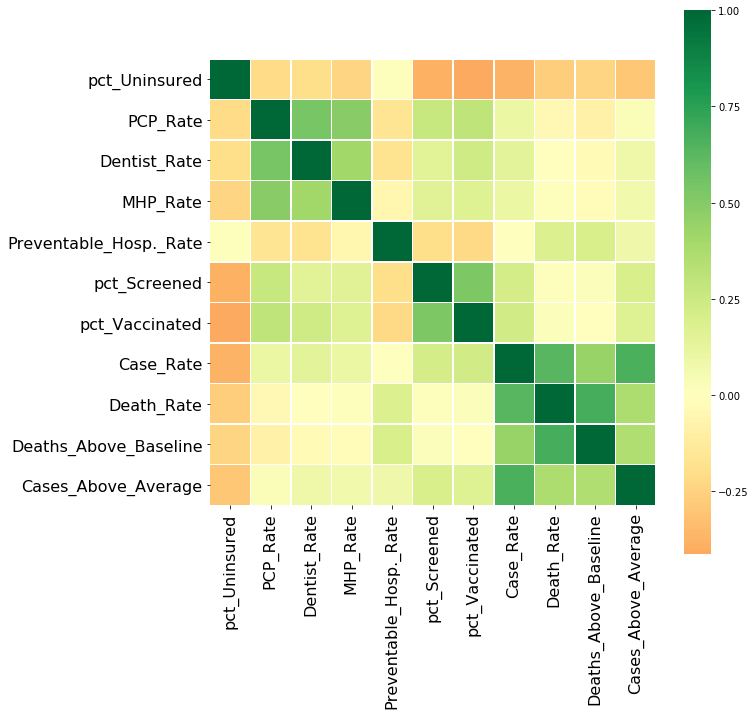

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(X_clinic.corr(), square=True, cmap='RdYlGn', center=0, linewidths=.5)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16);

In [107]:
master.columns

Index(['FIPS', 'State', 'County', 'Child_Mortality_Rate',
       'Infant_Mortality_Rate', 'pct_Diabetic', 'HIV_Prevalence_Rate',
       'pct_Food_Insecure', 'pct_Limited_Access_to_healthy_foods',
       'Drug_Overdose_Mortality_Rate', 'MV_Mortality_Rate',
       'pct_Insufficient_Sleep', 'Household_Income', 'pct_Homeowners',
       'pct_African_American', 'pct_American_Indian_Alaskan_Native',
       'pct_Asian', 'pct_Native_Hawaiian_Other_Pacific_Islander',
       'pct_Hispanic', 'pct_Non_Hispanic_White', 'pct_Fair_Poor',
       'Physically_Unhealthy_Days', 'Mentally_Unhealthy_Days', 'pct_LBW',
       'pct_Smokers', 'pct_Obese', 'Food_Environment_Index',
       'pct_Physically_Inactive', 'pct_access_excercise',
       'pct_Excessive_Drinking', 'pct_Alcohol_Impaired', 'Chlamydia_Rate',
       'Teen_Birth_Rate', 'pct_Uninsured', 'PCP_Rate', 'Dentist_Rate',
       'MHP_Rate', 'Preventable_Hosp._Rate', 'pct_Screened', 'pct_Vaccinated',
       'Graduation_Rate', 'pct_Some_College', 'pct_Une

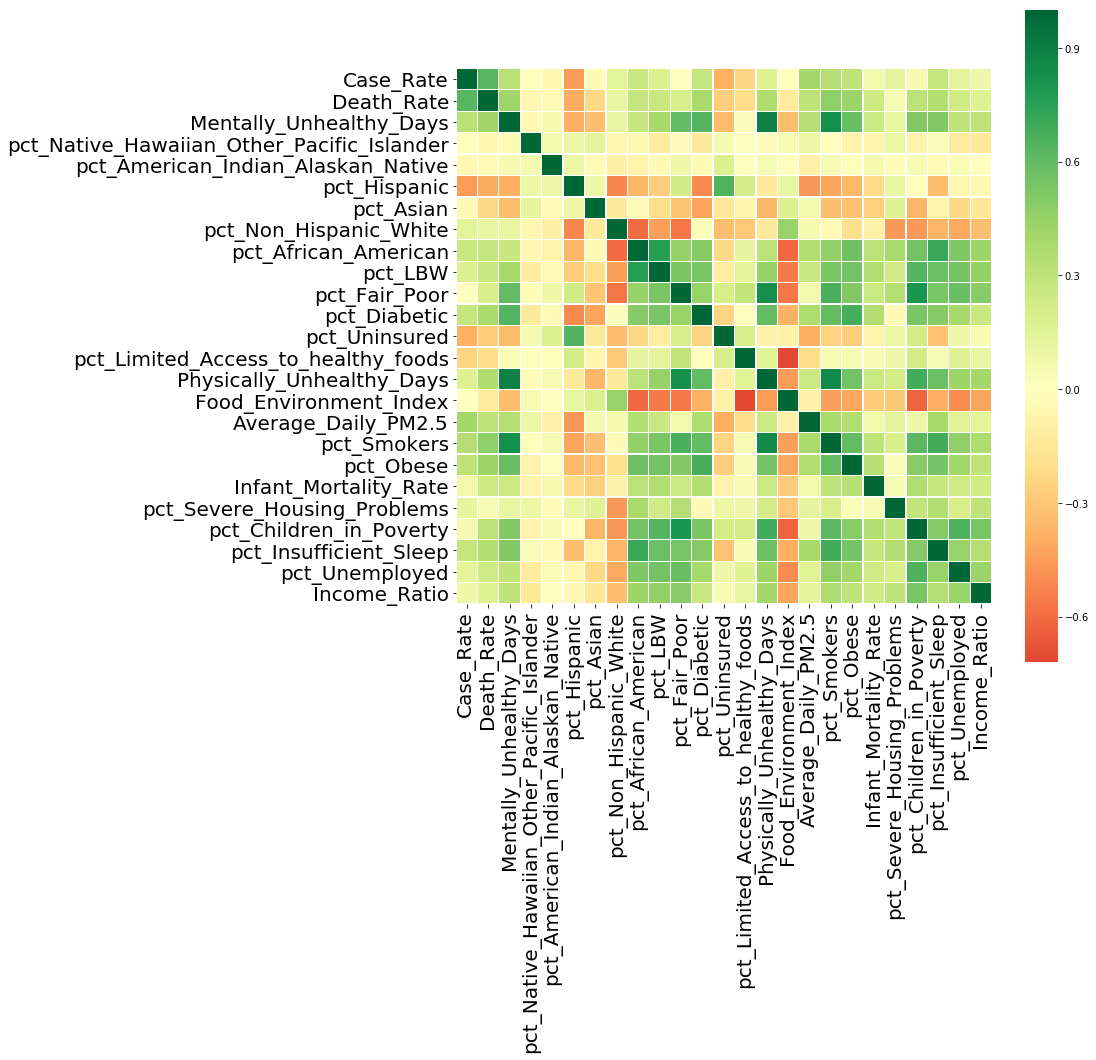

In [121]:
Selected_features=['Case_Rate', 'Death_Rate',
                   'Mentally_Unhealthy_Days', 'pct_Native_Hawaiian_Other_Pacific_Islander',
      'pct_American_Indian_Alaskan_Native', 'pct_Hispanic', 'pct_Asian','pct_Non_Hispanic_White', 
      'pct_African_American', 'pct_LBW','pct_Fair_Poor','pct_Diabetic',
      'pct_Uninsured','pct_Limited_Access_to_healthy_foods',
      'Physically_Unhealthy_Days','Food_Environment_Index','Average_Daily_PM2.5',
      'pct_Smokers', 'pct_Obese','Infant_Mortality_Rate', 
       'pct_Severe_Housing_Problems', 'pct_Children_in_Poverty', 'pct_Insufficient_Sleep', 'pct_Unemployed',
                   'Income_Ratio'
         
       ] 
Features = master[Selected_features]
plt.figure(figsize=(12,12))
sns.heatmap(Features.corr(), square=True, cmap='RdYlGn', center=0, linewidths=.25)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20);

# Modeling : 
## - Identifying factors, which can define cancer rate disparity in counties?
## - Identifyng counties having new cancer rate above the national average. 
## - Can we predict if a county is at risk cancer rate by this feature(s)?
## - Finding the feature(s) to detect above/below base-line of cancer death rate.
## - Can we set up an actionable target of those features to those counties which have above base-line cancer death rate considering 10% decrease in the cancer death rate as a target?

##  Death Rate vs all features: Linear regression model

In [54]:
# Death Rate

#X and y
X = master.drop(['FIPS', 'State', 'County', 'Case_Rate', 'Death_Rate', 'Deaths_Above_Baseline', 'Cases_Above_Average'], axis =1)
y = master.Death_Rate

#splitting into training and test for cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

#training the model
lreg = LinearRegression()
lreg.fit(X_train,y_train)
#predicting on test
pred_linear = lreg.predict(X_test)
#calculating mse
mse_linear = np.mean((pred_linear - y_test)**2)
print('Linear Model MSE : ', mse)
print('Linear Model R-Square : ', lreg.score(X_test,y_test))


# calculating coefficients
#coeff = DataFrame(X_train.columns)
#coeff['Coefficient Estimate'] = Series(lreg.coef_)
#print('coeff', coeff)
#checking the magnitude of coefficients
#plt.rcParams["figure.figsize"] = (10,10)
#predictors = X_train.columns
#coef = Series(lreg.coef_, predictors).sort_values()
#coef.plot(kind='barh', title='DEATH RATE ALL FEATURES: Linear Modal Coefficients')
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12);
#residual plot
#x_plot = plt.scatter(pred, (pred - y_test), c='b')
#plt.title('Residual plot')
#training the model

#Ridge
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X_train,y_train)
#predicting on test
pred_ridge = ridgeReg.predict(X_test)
#calculating mse

mse_ridge = np.mean((pred_ridge - y_test)**2)
print('Ridge Model MSE :', mse_ridge)
print('Ridge Model R-Square :', ridgeReg.score(X_test,y_test))
# calculating coefficients
#coeff = DataFrame(X_train.columns)
#coeff['Coefficient Estimate'] = Series(ridgeReg.coef_)
#print('coeff', coeff)
#training the model
#Lasso
lassoReg = Lasso(alpha=0.05, normalize=True)
lassoReg.fit(X_train,y_train)
pred_lasso = lassoReg.predict(X_test)
mse = np.mean((pred_lasso - y_test)**2)
print('Lasso Model MSE :', mse)
print('Lasso Model R-Square :', lassoReg.score(X_test,y_test))
# RMSE
#print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# calculating coefficients
#coeff = DataFrame(X_train.columns)
#coeff['Coefficient Estimate'] = Series(lassoReg.coef_)
#print('coeff', coeff)


Linear Model MSE :  737.1542557950231
Linear Model R-Square :  0.43407796875134064
Ridge Model MSE : 762.1341760345863
Ridge Model R-Square : 0.41490058885931685
Lasso Model MSE : 886.0465828941803
Lasso Model R-Square : 0.31977157015581414


### Feature selection based on mean feature cofficients ranking 

In [55]:
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler

# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [56]:
X = master.drop(['FIPS', 'State', 'County', 'Case_Rate', 'Death_Rate', 'Deaths_Above_Baseline', 'Cases_Above_Average'], axis =1)
y = master.Death_Rate
colnames = X.columns
# Construct our Linear Regression model
lr = LinearRegression(normalize=True)
lr.fit(X,y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,y)
ranks["LinReg"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

# Using Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(X,y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

# Using Lasso
lasso = Lasso(alpha=.05)
lasso.fit(X, y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 fe

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



In [57]:
ranks# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	Lasso	LinReg	Ridge	Mean
Child_Mortality_Rate	0.0	0.07	0.0	0.02
Infant_Mortality_Rate	0.07	0.78	0.07	0.31
pct_Diabetic	0.19	0.73	0.19	0.37
HIV_Prevalence_Rate	0.0	0.11	0.0	0.04
pct_Food_Insecure	0.03	0.62	0.02	0.22
pct_Limited_Access_to_healthy_foods	0.09	0.64	0.11	0.28
Drug_Overdose_Mortality_Rate	0.0	0.18	0.0	0.06
MV_Mortality_Rate	0.0	0.22	0.01	0.08
pct_Insufficient_Sleep	0.07	0.47	0.06	0.2
Household_Income	0.0	0.02	0.0	0.01
pct_Homeowners	0.09	0.36	0.09	0.18
pct_African_American	0.04	0.84	0.24	0.37
pct_American_Indian_Alaskan_Native	0.16	0.91	0.37	0.48
pct_Asian	0.04	0.93	0.26	0.41
pct_Native_Hawaiian_Other_Pacific_Islander	0.0	1.0	0.41	0.47
pct_Hispanic	0.1	0.89	0.3	0.43
pct_Non_Hispanic_White	0.07	0.87	0.28	0.41
pct_Fair_Poor	0.15	0.71	0.15	0.34
Physically_Unhealthy_Days	0.16	0.76	0.33	0.42
Mentally_Unhealthy_Days	1.0	0.67	1.0	0.89
pct_LBW	0.37	0.8	0.34	0.5
pct_Smokers	0.26	0.98	0.25	0.5
pct_Obese	0.14	0.82	0.13	0.36
Food_Environment_Index	0.0	0.6	0.24	0.28
pct_Physically_Inactiv

In [58]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

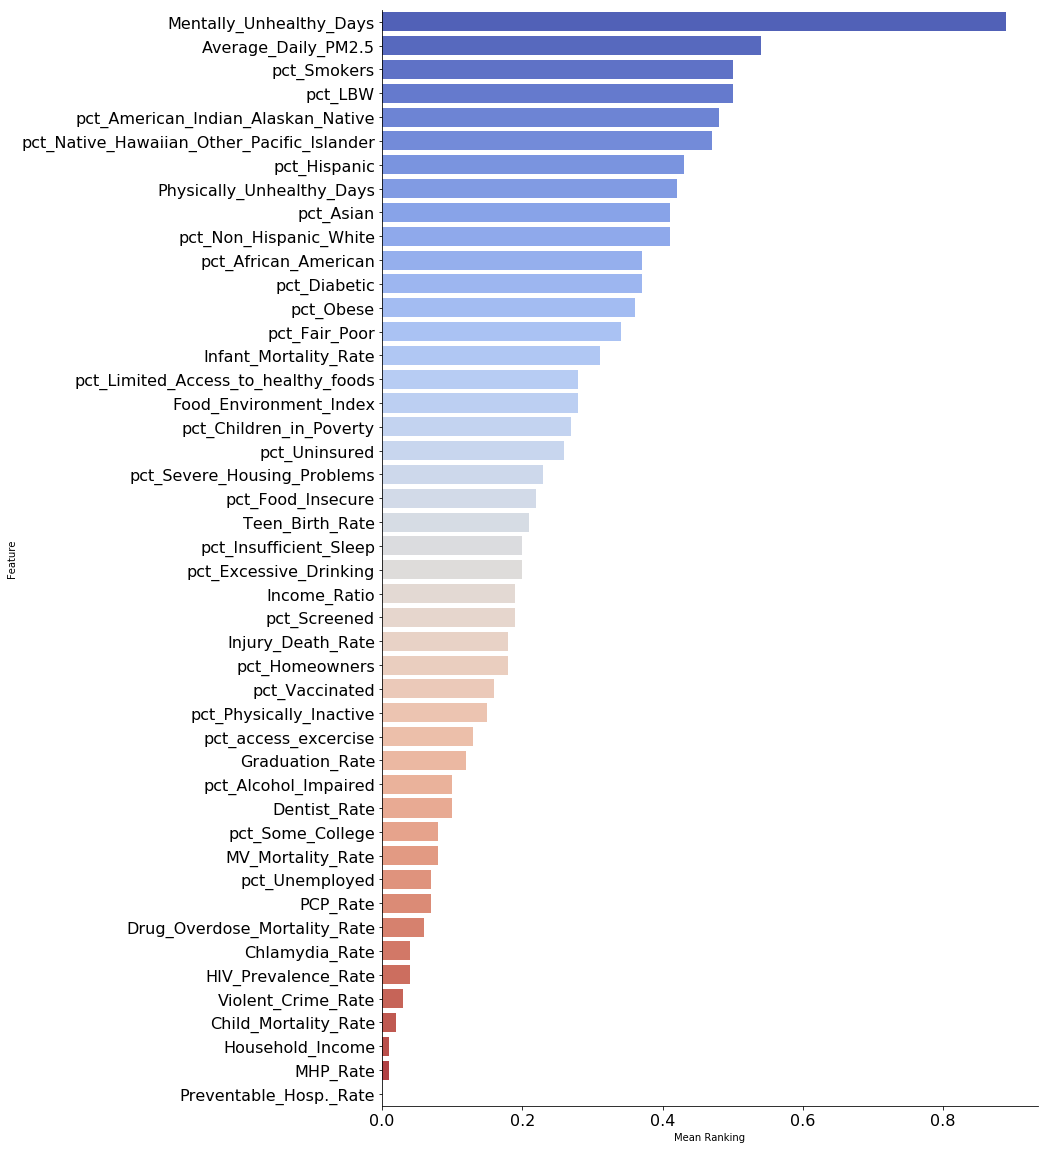

In [62]:
# Let's plot the ranking of the features
sns.catplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               height=16, aspect=0.8, palette='coolwarm')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

# Death Rate Model scores after feature selection

In [65]:
cols=['Mentally_Unhealthy_Days', 'pct_Native_Hawaiian_Other_Pacific_Islander',
      'pct_American_Indian_Alaskan_Native', 'pct_Hispanic', 'pct_Asian','pct_Non_Hispanic_White', 
      'pct_African_American', 'pct_LBW','pct_Fair_Poor','pct_Diabetic',
      'pct_Uninsured','pct_Limited_Access_to_healthy_foods',
      'Physically_Unhealthy_Days','Food_Environment_Index','Average_Daily_PM2.5',
      'pct_Smokers', 'pct_Obese','Infant_Mortality_Rate', 
       'pct_Severe_Housing_Problems', 'pct_Children_in_Poverty'
       ] 
X=master[cols]
y=master['Death_Rate']
#splitting into training and test for cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

#Linear model
lreg = LinearRegression()
lreg.fit(X_train,y_train)
#predicting on test
pred_linear = lreg.predict(X_test)
#calculating mse
mse_linear = np.mean((pred_linear - y_test)**2)
print('Linear Model MSE : ', mse)
print('Linear Model R-Square : ', lreg.score(X_test,y_test))

#Ridge
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X_train,y_train)
#predicting on test
pred_ridge = ridgeReg.predict(X_test)
#calculating mse
mse_ridge = np.mean((pred_ridge - y_test)**2)
print('Ridge Model MSE :', mse_ridge)
print('Ridge Model R-Square :', ridgeReg.score(X_test,y_test))

# Lasso
lassoReg = Lasso(alpha=0.05, normalize=True)
lassoReg.fit(X_train,y_train)
pred_lasso = lassoReg.predict(X_test)
mse = np.mean((pred_lasso - y_test)**2)
print('Lasso Model MSE :', mse)
print('Lasso Model R-Square :', lassoReg.score(X_test,y_test))


Linear Model MSE :  882.4879359828789
Linear Model R-Square :  0.32250358543308943
Ridge Model MSE : 884.5653508975033
Ridge Model R-Square : 0.3209087294596097
Lasso Model MSE : 928.6648027036916
Lasso Model R-Square : 0.2870530592970678


## Case Rate Linear regression: All features:

In [67]:
from sklearn.linear_model import Ridge

In [68]:
#X and y
X = master.drop(['FIPS', 'State', 'County', 'Case_Rate', 'Death_Rate','Deaths_Above_Baseline', 'Cases_Above_Average'], axis =1)
y = master.Case_Rate
#splitting into training and test for cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

#training the models

#Linear model
lreg = LinearRegression()
lreg.fit(X_train,y_train)
#predicting on test
pred_linear = lreg.predict(X_test)
#calculating mse
mse_linear = np.mean((pred_linear - y_test)**2)
print('Linear Model MSE : ', mse)
print('Linear Model R-Square : ', lreg.score(X_test,y_test))

#Ridge
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X_train,y_train)
#predicting on test
pred_ridge = ridgeReg.predict(X_test)
#calculating mse
mse_ridge = np.mean((pred_ridge - y_test)**2)
print('Ridge Model MSE :', mse_ridge)
print('Ridge Model R-Square :', ridgeReg.score(X_test,y_test))

# Lasso
lassoReg = Lasso(alpha=0.05, normalize=True)
lassoReg.fit(X_train,y_train)
pred_lasso = lassoReg.predict(X_test)
mse = np.mean((pred_lasso - y_test)**2)
print('Lasso Model MSE :', mse)
print('Lasso Model R-Square :', lassoReg.score(X_test,y_test))

Linear Model MSE :  3852.381408568681
Linear Model R-Square :  0.3706897018138592
Ridge Model MSE : 3730.6079257817555
Ridge Model R-Square : 0.3698353813559596
Lasso Model MSE : 3852.381408568681
Lasso Model R-Square : 0.3492657203602126


In [69]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [70]:
X = master.drop(['FIPS', 'State', 'County', 'Case_Rate', 'Death_Rate', 'Deaths_Above_Baseline', 'Cases_Above_Average'], axis =1)
y = master.Case_Rate
colnames = X.columns
# Construct our Linear Regression model
lr = LinearRegression(normalize=True)
lr.fit(X,y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,y)
ranks["LinReg"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

# Using Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(X,y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

# Using Lasso
lasso = Lasso(alpha=.05)
lasso.fit(X, y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 fe

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



In [71]:
ranks# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	Lasso	LinReg	Ridge	Mean
Child_Mortality_Rate	0.0	0.09	0.0	0.03
Infant_Mortality_Rate	0.12	0.56	0.12	0.27
pct_Diabetic	0.1	0.62	0.11	0.28
HIV_Prevalence_Rate	0.0	0.16	0.0	0.05
pct_Food_Insecure	0.11	0.31	0.1	0.17
pct_Limited_Access_to_healthy_foods	0.06	0.24	0.05	0.12
Drug_Overdose_Mortality_Rate	0.0	0.13	0.0	0.04
MV_Mortality_Rate	0.01	0.27	0.01	0.1
pct_Insufficient_Sleep	0.08	0.73	0.1	0.3
Household_Income	0.0	0.0	0.0	0.0
pct_Homeowners	0.08	0.49	0.09	0.22
pct_African_American	0.06	0.82	0.36	0.41
pct_American_Indian_Alaskan_Native	0.19	0.89	0.5	0.53
pct_Asian	0.17	0.87	0.49	0.51
pct_Native_Hawaiian_Other_Pacific_Islander	0.0	0.71	0.32	0.34
pct_Hispanic	0.15	0.91	0.45	0.5
pct_Non_Hispanic_White	0.14	0.84	0.45	0.48
pct_Fair_Poor	0.25	0.76	0.25	0.42
Physically_Unhealthy_Days	0.37	0.98	0.41	0.59
Mentally_Unhealthy_Days	1.0	1.0	1.0	1.0
pct_LBW	0.19	0.64	0.18	0.34
pct_Smokers	0.39	0.78	0.41	0.53
pct_Obese	0.12	0.67	0.13	0.31
Food_Environment_Index	0.0	0.93	0.1	0.34
pct_Physically_Inactive	0

In [72]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

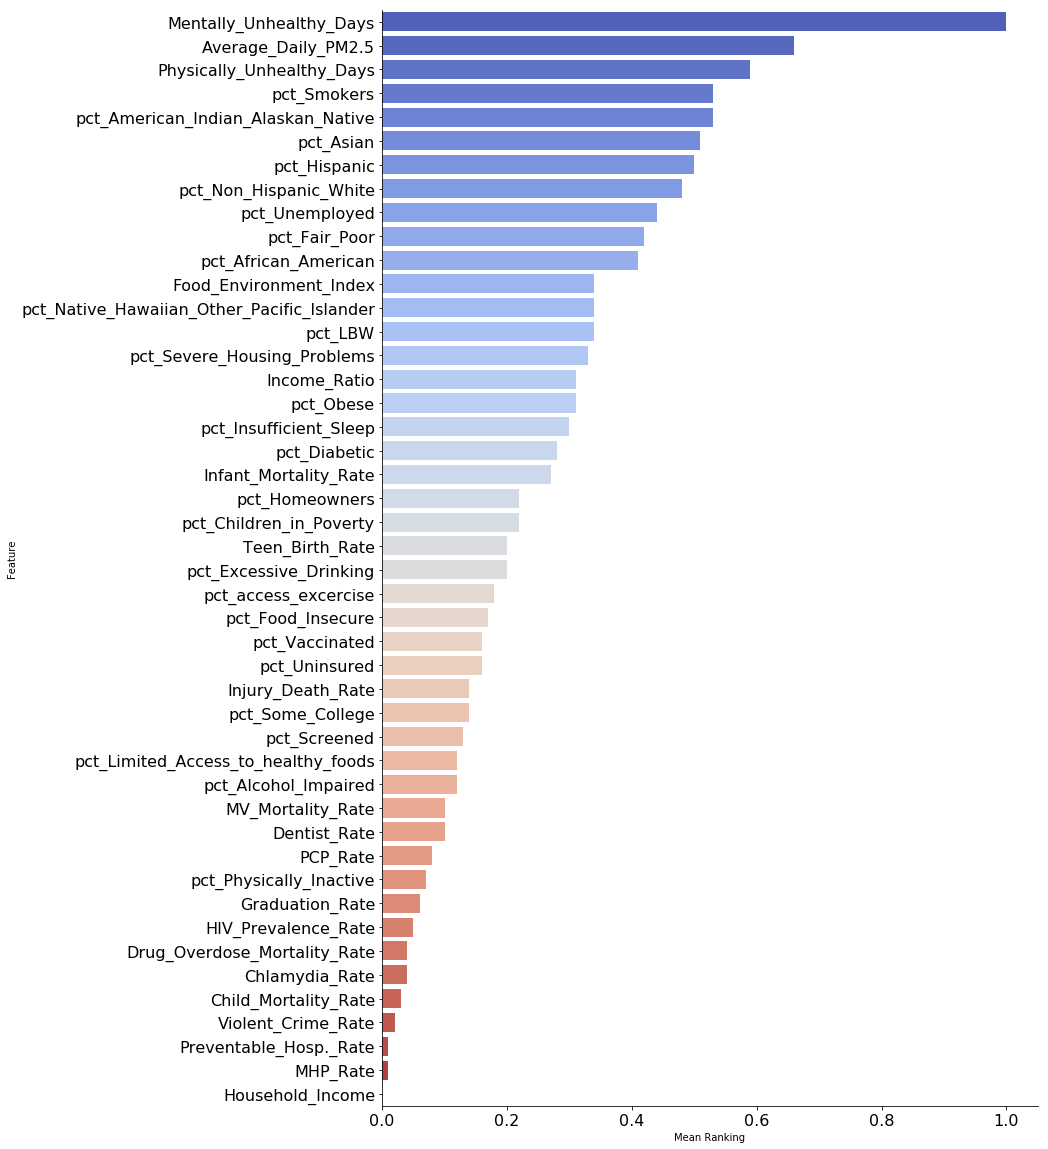

In [73]:
# Let's plot the ranking of the features
sns.catplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               height=16, aspect=0.8, palette='coolwarm')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

# Case Rate Model scores after feature selection

In [75]:
cols=['Mentally_Unhealthy_Days', 'pct_Native_Hawaiian_Other_Pacific_Islander',
      'pct_American_Indian_Alaskan_Native', 'pct_Hispanic', 'pct_Asian','pct_Non_Hispanic_White', 
      'pct_African_American', 'pct_LBW','pct_Fair_Poor','pct_Diabetic',
      'pct_Unemployed','Income_Ratio', 'pct_Insufficient_Sleep',
      'Physically_Unhealthy_Days','Food_Environment_Index','Average_Daily_PM2.5',
      'pct_Smokers', 'pct_Obese','Infant_Mortality_Rate', 
       'pct_Severe_Housing_Problems',
       ] 
X=master[cols]
y=master['Case_Rate']
#splitting into training and test for cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

#Linear model
lreg = LinearRegression()
lreg.fit(X_train,y_train)
#predicting on test
pred_linear = lreg.predict(X_test)
#calculating mse
mse_linear = np.mean((pred_linear - y_test)**2)
print('Linear Model MSE : ', mse)
print('Linear Model R-Square : ', lreg.score(X_test,y_test))

#Ridge
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X_train,y_train)
#predicting on test
pred_ridge = ridgeReg.predict(X_test)
#calculating mse
mse_ridge = np.mean((pred_ridge - y_test)**2)
print('Ridge Model MSE :', mse_ridge)
print('Ridge Model R-Square :', ridgeReg.score(X_test,y_test))

# Lasso
lassoReg = Lasso(alpha=0.05, normalize=True)
lassoReg.fit(X_train,y_train)
pred_lasso = lassoReg.predict(X_test)
mse = np.mean((pred_lasso - y_test)**2)
print('Lasso Model MSE :', mse)
print('Lasso Model R-Square :', lassoReg.score(X_test,y_test))

Linear Model MSE :  3852.381408568681
Linear Model R-Square :  0.3414064632269674
Ridge Model MSE : 3966.0099541721816
Ridge Model R-Square : 0.33007188103647683
Lasso Model MSE : 4116.611422978678
Lasso Model R-Square : 0.3046326713833237


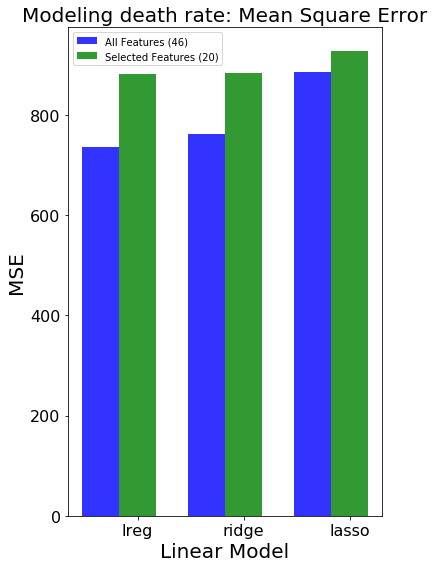

In [136]:
# data to plot
plt.rcParams["figure.figsize"] = (6,8)
n_groups = 3
all_feature = (737.1, 762.1, 886.0)
selected_features = (882.4, 884.5, 928.8)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, all_feature, bar_width,
alpha=opacity,
color='b',
label='All Features (46)')

rects2 = plt.bar(index + bar_width, selected_features, bar_width,
alpha=opacity,
color='g',
label='Selected Features (20)')

plt.xlabel('Linear Model', fontsize = 20)
plt.ylabel('MSE', fontsize =20)
plt.title('Modeling death rate: Mean Square Error', fontsize = 20)
plt.xticks(index + bar_width, ('lreg', 'ridge', 'lasso'))
plt.legend()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

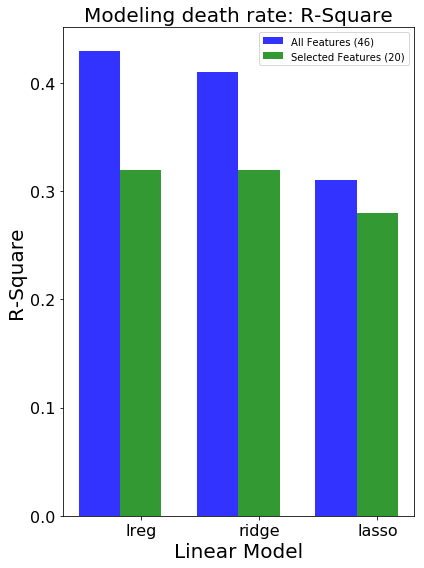

In [139]:
# data to plot
plt.rcParams["figure.figsize"] = (6,8)
n_groups = 3
all_feature = (0.43, 0.41, 0.31)
selected_features = (0.32, 0.32, 0.28)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, all_feature, bar_width,
alpha=opacity,
color='b',
label='All Features (46)')

rects2 = plt.bar(index + bar_width, selected_features, bar_width,
alpha=opacity,
color='g',
label='Selected Features (20)')

plt.xlabel('Linear Model', fontsize = 20)
plt.ylabel('R-Square', fontsize =20)
plt.title('Modeling death rate: R-Square', fontsize = 20)
plt.xticks(index + bar_width, ('lreg', 'ridge', 'lasso'))
plt.legend()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

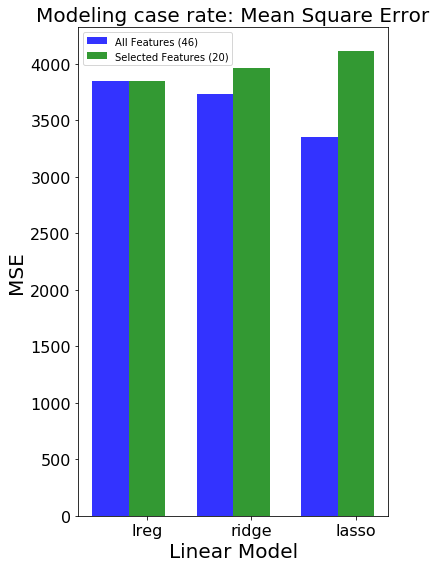

In [137]:
# data to plot
plt.rcParams["figure.figsize"] = (6,8)
n_groups = 3
all_feature = (3852.3, 3730.6, 3352.3)
selected_features = (3852.3, 3966.0, 4116.6)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, all_feature, bar_width,
alpha=opacity,
color='b',
label='All Features (46)')

rects2 = plt.bar(index + bar_width, selected_features, bar_width,
alpha=opacity,
color='g',
label='Selected Features (20)')

plt.xlabel('Linear Model', fontsize = 20)
plt.ylabel('MSE', fontsize =20)
plt.title('Modeling case rate: Mean Square Error', fontsize = 20)
plt.xticks(index + bar_width, ('lreg', 'ridge', 'lasso'))
plt.legend()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

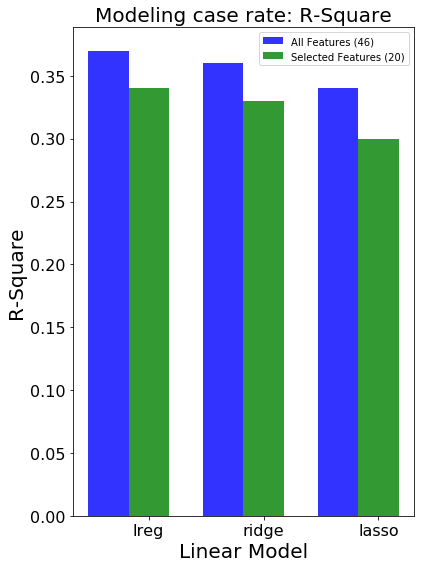

In [140]:
# data to plot
plt.rcParams["figure.figsize"] = (6,8)
n_groups = 3
all_feature = (0.37, 0.36, 0.34)
selected_features = (0.34, 0.33, 0.30)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, all_feature, bar_width,
alpha=opacity,
color='b',
label='All Features (46)')

rects2 = plt.bar(index + bar_width, selected_features, bar_width,
alpha=opacity,
color='g',
label='Selected Features (20)')

plt.xlabel('Linear Model', fontsize = 20)
plt.ylabel('R-Square', fontsize =20)
plt.title('Modeling case rate: R-Square', fontsize = 20)
plt.xticks(index + bar_width, ('lreg', 'ridge', 'lasso'))
plt.legend()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

# Class based modeling

In [895]:
master.Deaths_Above_Baseline.value_counts(normalize=True)

1    0.773205
0    0.226795
Name: Deaths_Above_Baseline, dtype: float64

In [896]:
master.Cases_Above_Average.value_counts(normalize=True)

0    0.512259
1    0.487741
Name: Cases_Above_Average, dtype: float64

In [106]:
fig = {
  "data": [
    {
      "values": [77.32049, 22.67951],
      "labels": [
        "Deaths Above Baseline",
        "Deaths Belove Baseline"
      ],
    "text":["Above Baseline"],
      "textposition":"inside",
      "domain": {"column": 0},
      "name": "Cancer Deaths",
      "hoverinfo":"label+percent",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": [51.225919, 48.774081],
      "labels": [
        "Cases Above Average",
        "Cases Below Average"
      ],
      "text":["Above Average"],
      "textposition":"inside",
      "domain": {"column": 1},
      "name": "New Cases",
      "hoverinfo":"label+percent",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Percentage of category",
        "grid": {"rows": 1, "columns": 2},
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Deaths",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Cases",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='donut')

# Modeling: Cancer News Cases--above/below national average

# Selected features

In [165]:
#X = pd.DataFrame(master.drop(['FIPS', 'State', 'County','Case_Rate','Death_Rate',
                             #'Deaths_Above_Baseline', 'Cases_Above_Average'], axis =1))
#X = master.Injury_Death_Rate.values
#y = master.Cases_Above_Average

In [177]:
cols=['Infant_Mortality_Rate', 'pct_Food_Insecure', 'pct_Insufficient_Sleep', 'pct_African_American', 
      'pct_American_Indian_Alaskan_Native',
       'pct_Asian', 'pct_Hispanic', 'pct_Non_Hispanic_White', 
      'pct_Fair_Poor', 'Mentally_Unhealthy_Days', 'pct_LBW',
       'pct_Smokers', 'pct_Obese', 'Food_Environment_Index','Teen_Birth_Rate', 'pct_Uninsured', 'pct_Unemployed',
       'Average_Daily_PM2.5'] 
X=master[cols]
y=master.Cases_Above_Average

In [178]:
X = scale(X) 
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

## Models

In [179]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
case_tree = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(case_tree.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(case_tree.score(X_test, y_test)))

#Setting max decision tree depth to help avoid overfitting
case_tree2 = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier with max tree depth on training set: {:.2f}'
     .format(case_tree2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on with max tree depth test set: {:.2f}'
     .format(case_tree2.score(X_test, y_test)))

#K-Nearest Neighbors
knn = KNeighborsClassifier()
case_knn = knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(case_knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(case_knn.score(X_test, y_test)))

#Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
case_lda = lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(case_lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(case_lda.score(X_test, y_test)))
#Random Forest
rfc_b = RFC()
rfc_b.fit(X_train,y_train)
y_pred = rfc_b.predict(X_train)
print('Accuracy of RFC on training set:',accuracy_score(y_train,y_pred))
print('Accuracy of RFC on test set:', accuracy_score(y_test,rfc_b.predict(X_test)));

Accuracy of Logistic regression classifier on training set: 0.68
Accuracy of Logistic regression classifier on test set: 0.72
Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.66
Accuracy of Decision Tree classifier with max tree depth on training set: 0.70
Accuracy of Decision Tree classifier on with max tree depth test set: 0.69
Accuracy of K-NN classifier on training set: 0.76
Accuracy of K-NN classifier on test set: 0.71
Accuracy of LDA classifier on training set: 0.70
Accuracy of LDA classifier on test set: 0.74
Accuracy of RFC on training set: 0.9941588785046729
Accuracy of RFC on test set: 0.6573426573426573


/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



## CatBoost

In [186]:
model = CatBoostClassifier(iterations=200, boosting_type='Ordered', task_type="CPU")
case_cat = model.fit(X_train, y_train, silent=True)
#Making predictions and calculating mean absolute error

y_pred = model.predict(X_test)
mse = mean_absolute_error(y_pred, y_test)
print('CatBoostClassifieron MSE: ', mse)
#Calculating score of the model
print('Accuracy of CatBoostClassifieron on training set: {:.2f}'.format(case_cat.score(X_train, y_train)))
print('Accuracy of CatBoostClassifier on test set: ', case_cat.score(X_test, y_test))

CatBoostClassifieron MSE:  0.2692307692307692
Accuracy of CatBoostClassifieron on training set: 0.93
Accuracy of CatBoostClassifier on test set:  0.7307692307692307


In [187]:
#Printing confusion mmatrix
confusion_matrix(y_test, y_pred)

TypeError: 'numpy.ndarray' object is not callable

In [188]:
# Printing confusion matrix
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print(TN, FP, FN, TP)
n = TN + FP + FN + TP

TypeError: 'numpy.ndarray' object is not callable

In [189]:
print('CatBoost Classification Model')
print(classification_report(y_test, y_pred))

CatBoost Classification Model
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       144
           1       0.70      0.81      0.75       142

   micro avg       0.73      0.73      0.73       286
   macro avg       0.74      0.73      0.73       286
weighted avg       0.74      0.73      0.73       286



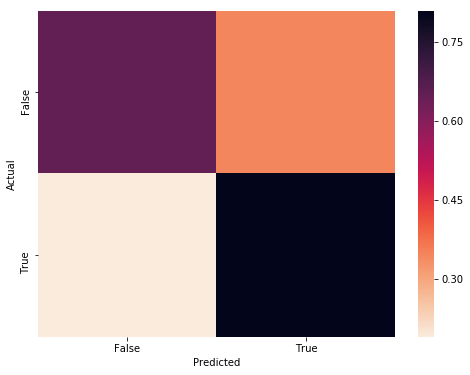

In [190]:
plt.rcParams["figure.figsize"] = (8,6)
cmap = sns.cm.rocket_r
conf = ConfusionMatrix(y_test.tolist(), y_pred)
conf.plot(backend='seaborn', normalized = True, cmap=cmap);

# Modeling cancer death above baseline

## Over Sampling Using Smote

In [194]:
X = pd.DataFrame(master.drop(['FIPS', 'State', 'County','Case_Rate','Death_Rate',
                             'Deaths_Above_Baseline', 'Cases_Above_Average'], axis =1))
#X = master.Injury_Death_Rate.values
y = master.Deaths_Above_Baseline

In [195]:
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of Deaths Below baseline in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of Deaths Above baseline",len(os_data_y[os_data_y['y']==1]))
print("Proportion of Death Below baseline data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of Death Above baseline data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  1218
Number of Deaths Below baseline in oversampled data 609
Number of Deaths Above baseline 609
Proportion of Death Below baseline data in oversampled data is  0.5
Proportion of Death Above baseline data in oversampled data is  0.5


In [196]:
#Creating catboost model
model = CatBoostClassifier(iterations=100, boosting_type='Ordered', task_type="CPU")
model.fit(X_train, y_train, silent=True)
#Making predictions and calculating mean absolute error
y_pred = model.predict(X_test)
mse = mean_absolute_error(y_pred, y_test)
print('MSE: ', mse)
#Calculating score of the model
print('Model score on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('MODEL SCORE on test set: ', model.score(X_test, y_test))

#Printing confusion mmatrix
print(confusion_matrix(y_test, y_pred))

MSE:  0.13994169096209913
Model score on training set: 0.97
MODEL SCORE on test set:  0.8600583090379009


TypeError: 'numpy.ndarray' object is not callable

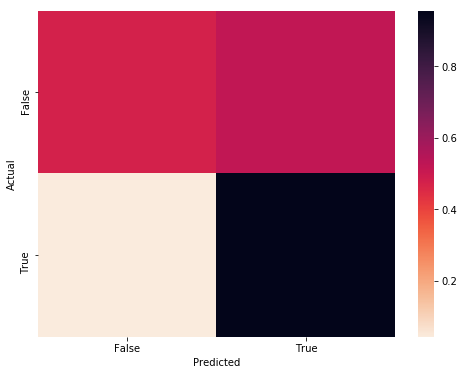

In [197]:
plt.rcParams["figure.figsize"] = (8,6)
cmap = sns.cm.rocket_r
conf = ConfusionMatrix(y_test.tolist(), y_pred)
conf.plot(backend='seaborn', normalized = True, cmap=cmap);

In [198]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
clf1 = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf1.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf1.score(X_test, y_test)))
# Setting up maximum
clf2 = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier (max_depth) on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier (max_depth) on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

#Logistic Regression
logreg = LogisticRegression()
log_model = logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(log_model.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(log_model.score(X_test, y_test)))

#KNN
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_model.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_model.score(X_test, y_test)))

#LinearDiscriminant Analysis
lda = LinearDiscriminantAnalysis()
lda_model = lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda_model.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda_model.score(X_test, y_test)))

#SVC
svm = SVC()
svm_model = svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm_model.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm_model.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.79
Accuracy of Decision Tree classifier (max_depth) on training set: 0.85
Accuracy of Decision Tree classifier (max_depth) on test set: 0.82
Accuracy of Logistic regression classifier on training set: 0.86
Accuracy of Logistic regression classifier on test set: 0.82
Accuracy of K-NN classifier on training set: 0.83
Accuracy of K-NN classifier on test set: 0.79
Accuracy of LDA classifier on training set: 0.86
Accuracy of LDA classifier on test set: 0.84
Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 0.80


/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



# Feature Selection

In [199]:
data_final_vars=master.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

In [200]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 10)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/use

[False  True False False False False False False False False False  True
 False  True False  True  True  True False  True False  True  True False
 False False False False False False False False False False False False
 False False False  True False False False False False False]
[27  1 15 32  4 17 13 19 11 37 24  1  2  1  9  1  1  1 10  1  7  1  1  3
 33 25 16 31 30  8  6 28 29 34 36 21 26 18 23  1 14 22 35 20  5 12]


/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/use

In [201]:
cols=['Infant_Mortality_Rate', 'pct_Food_Insecure', 'pct_Insufficient_Sleep', 'pct_African_American', 
      'pct_American_Indian_Alaskan_Native',
       'pct_Asian', 'pct_Hispanic', 'pct_Non_Hispanic_White', 
      'pct_Fair_Poor', 'Mentally_Unhealthy_Days', 'pct_LBW',
       'pct_Smokers', 'pct_Obese', 'Food_Environment_Index','Teen_Birth_Rate', 'pct_Uninsured', 'pct_Unemployed',
       'Average_Daily_PM2.5'] 
X=os_data_X[cols]
y=os_data_y['y']

In [202]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.387132
         Iterations 7
                                  Results: Logit
Model:                    Logit                 Pseudo R-squared:      0.441      
Dependent Variable:       y                     AIC:                   979.0531   
Date:                     2019-05-11 13:26      BIC:                   1070.9425  
No. Observations:         1218                  Log-Likelihood:        -471.53    
Df Model:                 17                    LL-Null:               -844.25    
Df Residuals:             1200                  LLR p-value:           1.8788e-147
Converged:                1.0000                Scale:                 1.0000     
No. Iterations:           7.0000                                                  
----------------------------------------------------------------------------------
                                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------

p-value for pct_Native_Hawaiian_Other_Pacific_Islander and Physically_Unhealthy_Days is very high so I am dropping these features.

## Logistic Regression Model Fitting

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [204]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [205]:
confusion_matrix = confusion_matrix(y_test.tolist(), y_pred.tolist())
print(confusion_matrix)

TypeError: 'numpy.ndarray' object is not callable

In [206]:
from sklearn.metrics import classification_report

In [207]:
print('Logistic Regression Model')
print(classification_report(y_test, y_pred))

Logistic Regression Model
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       197
           1       0.80      0.81      0.81       169

   micro avg       0.82      0.82      0.82       366
   macro avg       0.82      0.82      0.82       366
weighted avg       0.82      0.82      0.82       366



## Cross Validation

In [208]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=5, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy: %.3f" % (results.mean()))


5-fold cross validation average accuracy: 0.819


/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



## ROC AUC Score

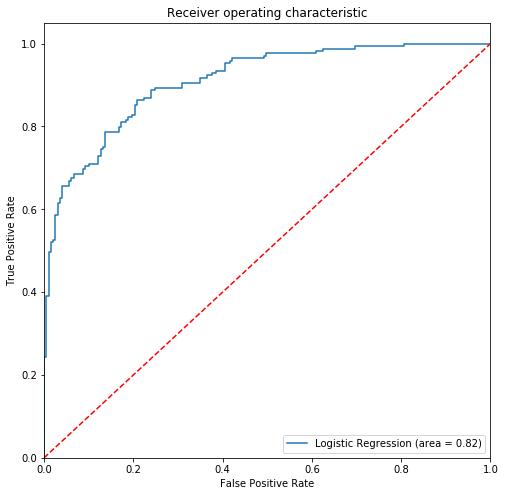

In [209]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
plt.rcParams["figure.figsize"] = (8,8)
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Diiferent models using selected features after oversampling death rate

In [210]:
#Logistic Regression
logreg = LogisticRegression()
log_model = logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(log_model.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(log_model.score(X_test, y_test)))

#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
clf1 = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf1.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf1.score(X_test, y_test)))
# Setting up maximum
clf2 = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))


#KNN
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_model.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_model.score(X_test, y_test)))

#LinearDiscriminant Analysis
lda = LinearDiscriminantAnalysis()
lda_model = lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda_model.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda_model.score(X_test, y_test)))

#SVC
svm = SVC()
svm_model = svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm_model.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm_model.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.83
Accuracy of Logistic regression classifier on test set: 0.82
Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.78
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on test set: 0.78
Accuracy of K-NN classifier on training set: 0.87
Accuracy of K-NN classifier on test set: 0.81
Accuracy of LDA classifier on training set: 0.83
Accuracy of LDA classifier on test set: 0.81
Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 0.72


/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver wil

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' o

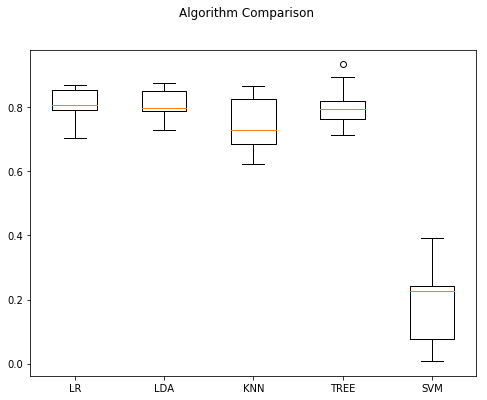

In [223]:
X = os_data_X
y = os_data_y.values

# prepare configuration for cross validation test harness
seed = 5
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('TREE', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

# Catboost model using selected features after oversampling death rate

In [212]:
model = CatBoostClassifier(iterations=100, boosting_type='Ordered', task_type="CPU")
model.fit(X_train, y_train, silent=True)
#Making predictions and calculating mean absolute error
y_pred = model.predict(X_test)
mse = mean_absolute_error(y_pred, y_test)
print('MSE: ', mse)
#Calculating score of the model
print('Model score on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('MODEL SCORE on test set: ', model.score(X_test, y_test))
#Printing confusion mmatrix
conf = ConfusionMatrix(y_test, y_pred)
print(conf)

MSE:  0.1366120218579235
Model score on training set: 0.97
MODEL SCORE on test set:  0.8633879781420765
Predicted  False  True  __all__
Actual                         
False         12    11       23
True          41    30       71
__all__       53    41       94


In [213]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       197
           1       0.84      0.87      0.85       169

   micro avg       0.86      0.86      0.86       366
   macro avg       0.86      0.86      0.86       366
weighted avg       0.86      0.86      0.86       366



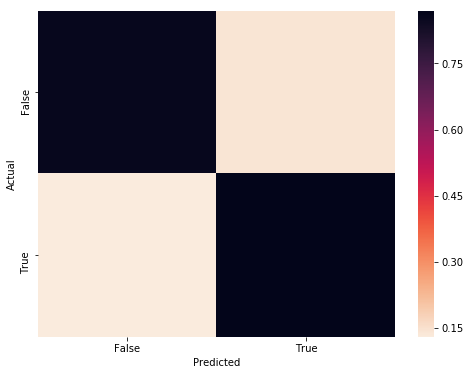

In [214]:
plt.rcParams["figure.figsize"] = (8,6)
cmap = sns.cm.rocket_r
conf = ConfusionMatrix(y_test.tolist(), y_pred)
conf.plot(backend='seaborn', normalized = True, cmap=cmap);

# xgboost

In [215]:
#!pip3 install xgboost

In [216]:
import xgboost as xgb

In [217]:
xg_train = xgb.DMatrix(X_train, label=y_train)
xg_test = xgb.DMatrix(X_test, label=y_test)
xg_train.save_binary('train.buffer')
xg_test.save_binary('train.buffer')
# setup parameters for xgboost
param = {}
# use softmax multi-class classification
param['objective'] = 'multi:softmax'
param['silent'] = 1 # cleans up the output
param['num_class'] = 2 # number of classes in target label

watchlist = [(xg_train, 'train'), (xg_test, 'test')]
num_round = 30
bst = xgb.train(param, xg_train, num_round, watchlist)

[0]	train-merror:0.105634	test-merror:0.245902
[1]	train-merror:0.085681	test-merror:0.226776
[2]	train-merror:0.064554	test-merror:0.202186
[3]	train-merror:0.039906	test-merror:0.185792
[4]	train-merror:0.034038	test-merror:0.180328
[5]	train-merror:0.0223	test-merror:0.174863
[6]	train-merror:0.017606	test-merror:0.166667
[7]	train-merror:0.014085	test-merror:0.153005
[8]	train-merror:0.012911	test-merror:0.147541
[9]	train-merror:0.005869	test-merror:0.142077
[10]	train-merror:0.003521	test-merror:0.139344
[11]	train-merror:0.002347	test-merror:0.139344
[12]	train-merror:0.002347	test-merror:0.139344
[13]	train-merror:0.003521	test-merror:0.139344
[14]	train-merror:0.002347	test-merror:0.139344
[15]	train-merror:0.001174	test-merror:0.131148
[16]	train-merror:0.001174	test-merror:0.13388
[17]	train-merror:0.001174	test-merror:0.13388
[18]	train-merror:0	test-merror:0.131148
[19]	train-merror:0	test-merror:0.128415


/Users/user/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[20]	train-merror:0	test-merror:0.128415
[21]	train-merror:0	test-merror:0.131148
[22]	train-merror:0	test-merror:0.139344
[23]	train-merror:0	test-merror:0.131148
[24]	train-merror:0	test-merror:0.128415
[25]	train-merror:0	test-merror:0.125683
[26]	train-merror:0	test-merror:0.122951
[27]	train-merror:0	test-merror:0.128415
[28]	train-merror:0	test-merror:0.128415
[29]	train-merror:0	test-merror:0.131148


merror: Multiclass classification error rate. It is calculated as #(wrong cases)/#(all cases)

In [219]:
# get prediction
y_pred1 = bst.predict(xg_train)
y_pred2 = bst.predict(xg_test)
print('xgboost Train accuracy score:',accuracy_score(y_train,y_pred1))
print('xgboost Test accuracy score:',accuracy_score(y_test,bst.predict(xg_test)))


xgboost Train accuracy score: 1.0
xgboost Test accuracy score: 0.8688524590163934
